## Cab Investment G2M Data understanding & Insight notebook
### Zeru Zhou

### Read the datasets

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import time

In [2]:
cab_data = pd.read_csv('../DataSets/Cab_Data.csv')
city_data = pd.read_csv('../DataSets/City.csv')
customerid_data = pd.read_csv('../DataSets/Customer_ID.csv')
transactionid_data = pd.read_csv('../DataSets/Transaction_ID.csv')

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
customerid_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
transactionid_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### Data preparation

In [9]:
cab_data.isna().value_counts()

Transaction ID  Date of Travel  Company  City   KM Travelled  Price Charged  Cost of Trip
False           False           False    False  False         False          False           359392
dtype: int64

In [10]:
city_data.isna().value_counts()

City   Population  Users
False  False       False    20
dtype: int64

In [11]:
customerid_data.isna().value_counts()

Customer ID  Gender  Age    Income (USD/Month)
False        False   False  False                 49171
dtype: int64

In [12]:
transactionid_data.isna().value_counts()

Transaction ID  Customer ID  Payment_Mode
False           False        False           440098
dtype: int64

#### No NA value detected. 

### Check duplicates

In [16]:
cab_data.duplicated().value_counts()

False    359392
dtype: int64

In [17]:
city_data.duplicated().value_counts()

False    20
dtype: int64

In [18]:
customerid_data.duplicated().value_counts()

False    49171
dtype: int64

In [19]:
transactionid_data.duplicated().value_counts()

False    440098
dtype: int64

#### No duplicates found

## Merge the data one step at a time

#### merge the cab data and city data

In [20]:
cab_update = cab_data.merge(city_data, how='left', left_on='City', right_on='City')
cab_update.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


#### merge the updated cab data and transaction data

In [21]:
transactionid_data_update = transactionid_data.merge(cab_update, how='left', left_on='Transaction ID', right_on='Transaction ID')
transactionid_data_update.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,27703,Card,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,28712,Cash,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,28020,Cash,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,27182,Card,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


#### merge the updated data with customer id data

In [22]:
final_data = transactionid_data_update.merge(customerid_data, how='left', left_on='Customer ID', right_on='Customer ID')
final_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",Male,28,10813
1,10000012,27703,Card,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",Male,27,9237
2,10000013,28712,Cash,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",Male,53,11242
3,10000014,28020,Cash,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",Male,23,23327
4,10000015,27182,Card,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",Male,33,8536


In [23]:
final_data.shape

(440098, 14)

In [44]:
final_data = final_data.dropna()
final_data.to_csv('../Datasets/final_data.csv')

#### As above, we get the final merged data based on each transactions.

## Analysis 

### Check the KM travelled for each company in different locations

In [25]:
final_data['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [26]:
final_data.groupby(['City', 'Company']).mean('KM Travelled')

Transaction ID   Customer ID  Date of Travel  \
City           Company                                                    
ATLANTA GA     Pink Cab      1.021965e+07  28504.842225    42965.583428   
               Yellow Cab    1.022087e+07  28489.815531    42965.342192   
AUSTIN TX      Pink Cab      1.023399e+07  34513.518737    43001.760707   
               Yellow Cab    1.022852e+07  34522.128798    42983.573316   
BOSTON MA      Pink Cab      1.022321e+07  58514.572889    42972.965484   
               Yellow Cab    1.021511e+07  58496.896638    42951.708398   
CHICAGO IL     Pink Cab      1.022344e+07   4502.226685    42973.524837   
               Yellow Cab    1.021570e+07   4506.194059    42952.399141   
DALLAS TX      Pink Cab      1.021781e+07  25505.702174    42959.528261   
               Yellow Cab    1.021921e+07  25504.589675    42959.396665   
DENVER CO      Pink Cab      1.022396e+07  31488.967001    42973.725968   
               Yellow Cab    1.022184e+07  31507.605512    42965.376388   
LOS ANGELES CA Pink Cab      1.022057e+07   7495.182180    42967.423257   
               Yellow Cab    1.021618e+07   7506.856397    42953.601285   
MIAMI FL       Pink Cab      1.023076e+07  10535.386114    42992.178821   
               Yellow Cab    1.023958e+07  10498.449236    43006.221249   
NASHVILLE TN   Pink Cab      1.022059e+07  55484.516567    42969.130364   
               Yellow Cab    1.022409e+07  55477.346450    42972.494440   
NEW YORK NY    Pink Cab      1.023419e+07   1505.849502    43000.537195   
               Yellow Cab    1.022432e+07   1502.648013    42970.829465   
ORANGE COUNTY  Pink Cab      1.022786e+07  16486.165896    42984.194316   
               Yellow Cab    1.022830e+07  16516.872418    42979.826650   
PHOENIX AZ     Pink Cab      1.021728e+07  22477.519676    42958.750000   
               Yellow Cab    1.022461e+07  22507.530000    42971.127500   
PITTSBURGH PA  Pink Cab      1.022534e+07  49459.887097    42980.775660   
               Yellow Cab    1.022349e+07  49460.448494    42969.134707   
SACRAMENTO CA  Pink Cab      1.022323e+07  46480.835082    42972.568966   
               Yellow Cab    1.022273e+07  46474.981607    42965.006776   
SAN DIEGO CA   Pink Cab      1.021946e+07  19497.509933    42964.926162   
               Yellow Cab    1.022128e+07  19509.705277    42963.077221   
SEATTLE WA     Pink Cab      1.021363e+07  37493.860176    42947.505857   
               Yellow Cab    1.021592e+07  37516.196391    42949.260969   
SILICON VALLEY Pink Cab      1.022495e+07  13504.348960    42976.591783   
               Yellow Cab    1.022378e+07  13481.422702    42969.166878   
TUCSON AZ      Pink Cab      1.022133e+07  40480.036295    42968.602003   
               Yellow Cab    1.022470e+07  40519.198763    42970.598940   
WASHINGTON DC  Pink Cab      1.022286e+07  52494.270314    42969.853738   
               Yellow Cab    1.021578e+07  52503.812561    42948.848945   

                           KM Travelled  Price Charged  Cost of Trip  \
City           Company                                                 
ATLANTA GA     Pink Cab       22.539824     302.131555    247.619594   
               Yellow Cab     22.248247     422.413446    293.615723   
AUSTIN TX      Pink Cab       21.969176     320.435070    241.502901   
               Yellow Cab     22.512840     422.248940    296.999358   
BOSTON MA      Pink Cab       22.740746     300.551489    250.030529   
               Yellow Cab     22.543649     359.140431    297.656812   
CHICAGO IL     Pink Cab       22.511070     281.613731    247.565821   
               Yellow Cab     22.659493     364.021927    299.097441   
DALLAS TX      Pink Cab       22.021203     260.025652    242.105281   
               Yellow Cab     22.599395     493.807790    297.958374   
DENVER CO      Pink Cab       22.459218     276.202453    247.088437   
               Yellow Cab     22.444097     443.235413    296.382238   
LOS ANGELES CA Pin

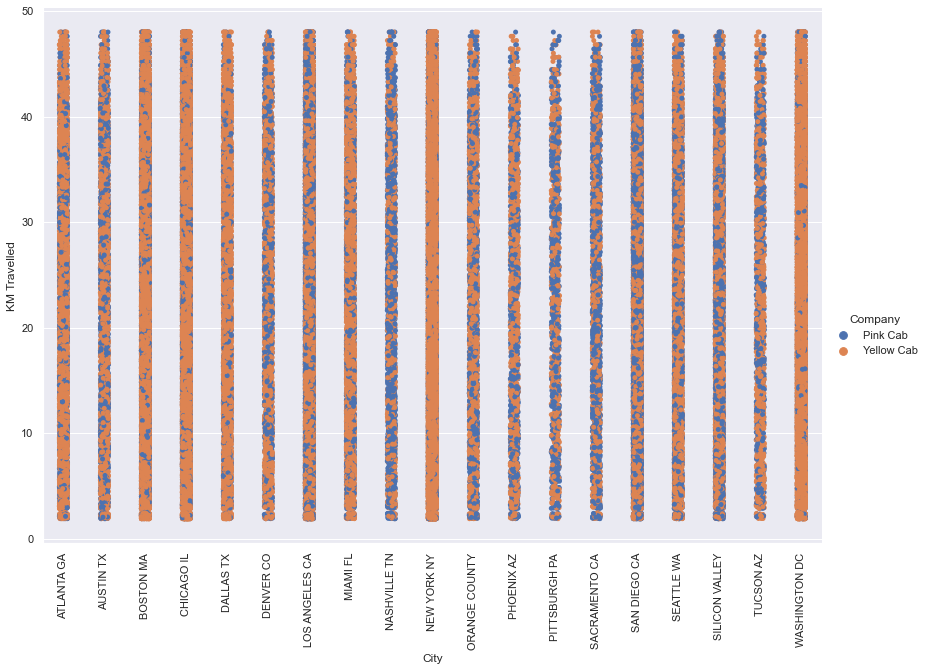

In [34]:
sns.catplot(data=final_data, x='City', y='KM Travelled', hue='Company', height=8.27, aspect=11.7/8.27).set_xticklabels(rotation=90)

#### Sum of KM travelled vs different company in different places

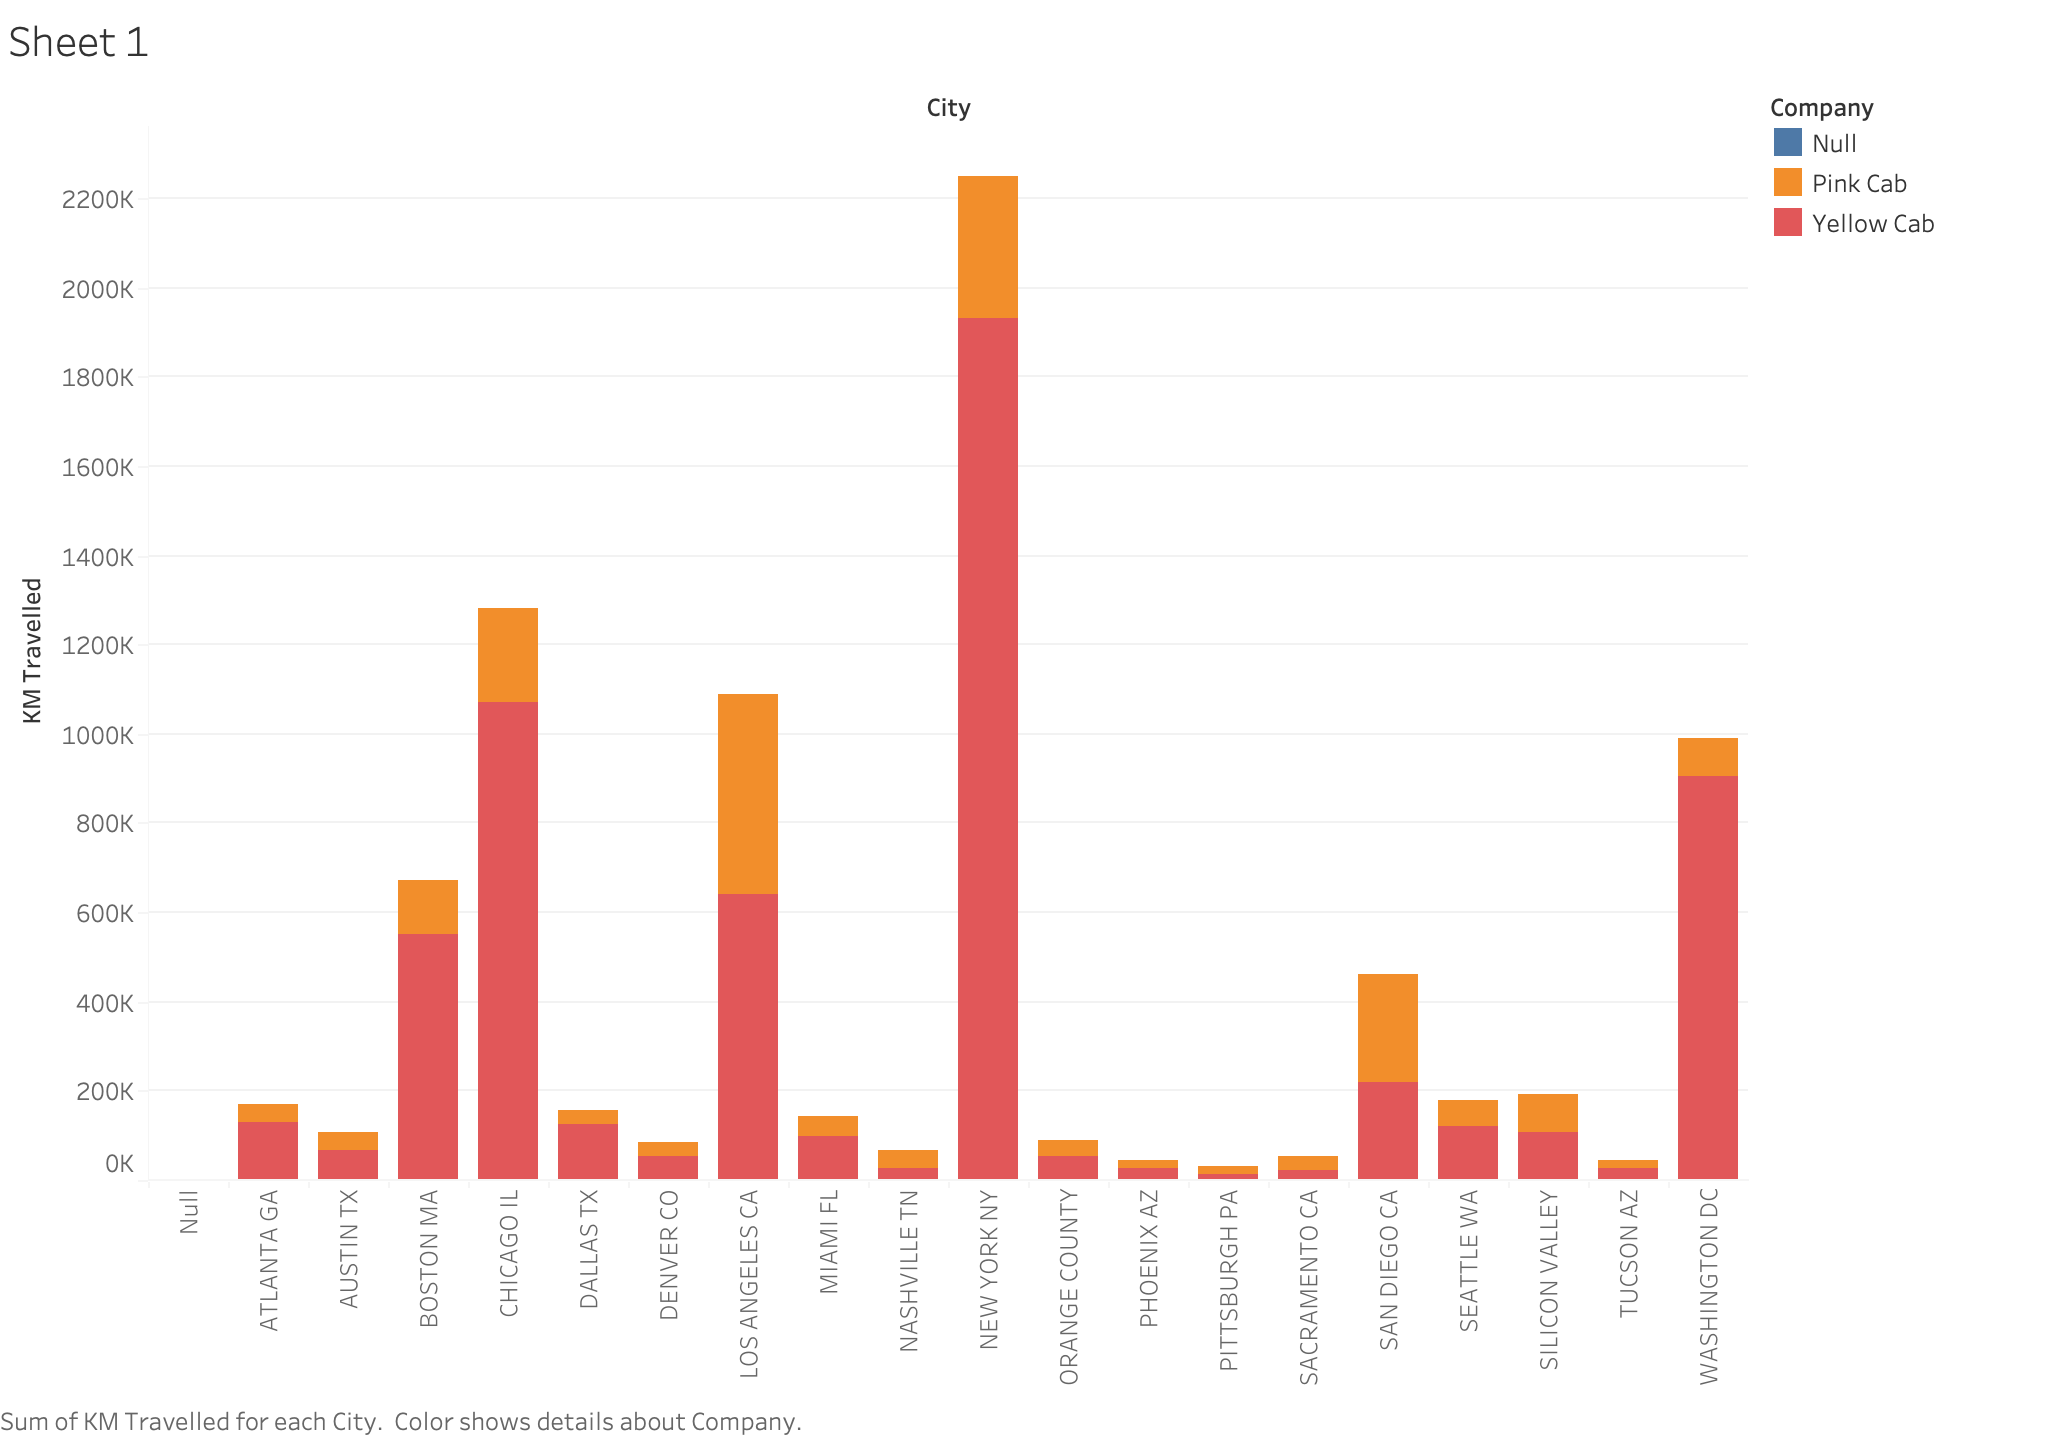

### Average Income vs different company

In [43]:
final_data = final_data.dropna()

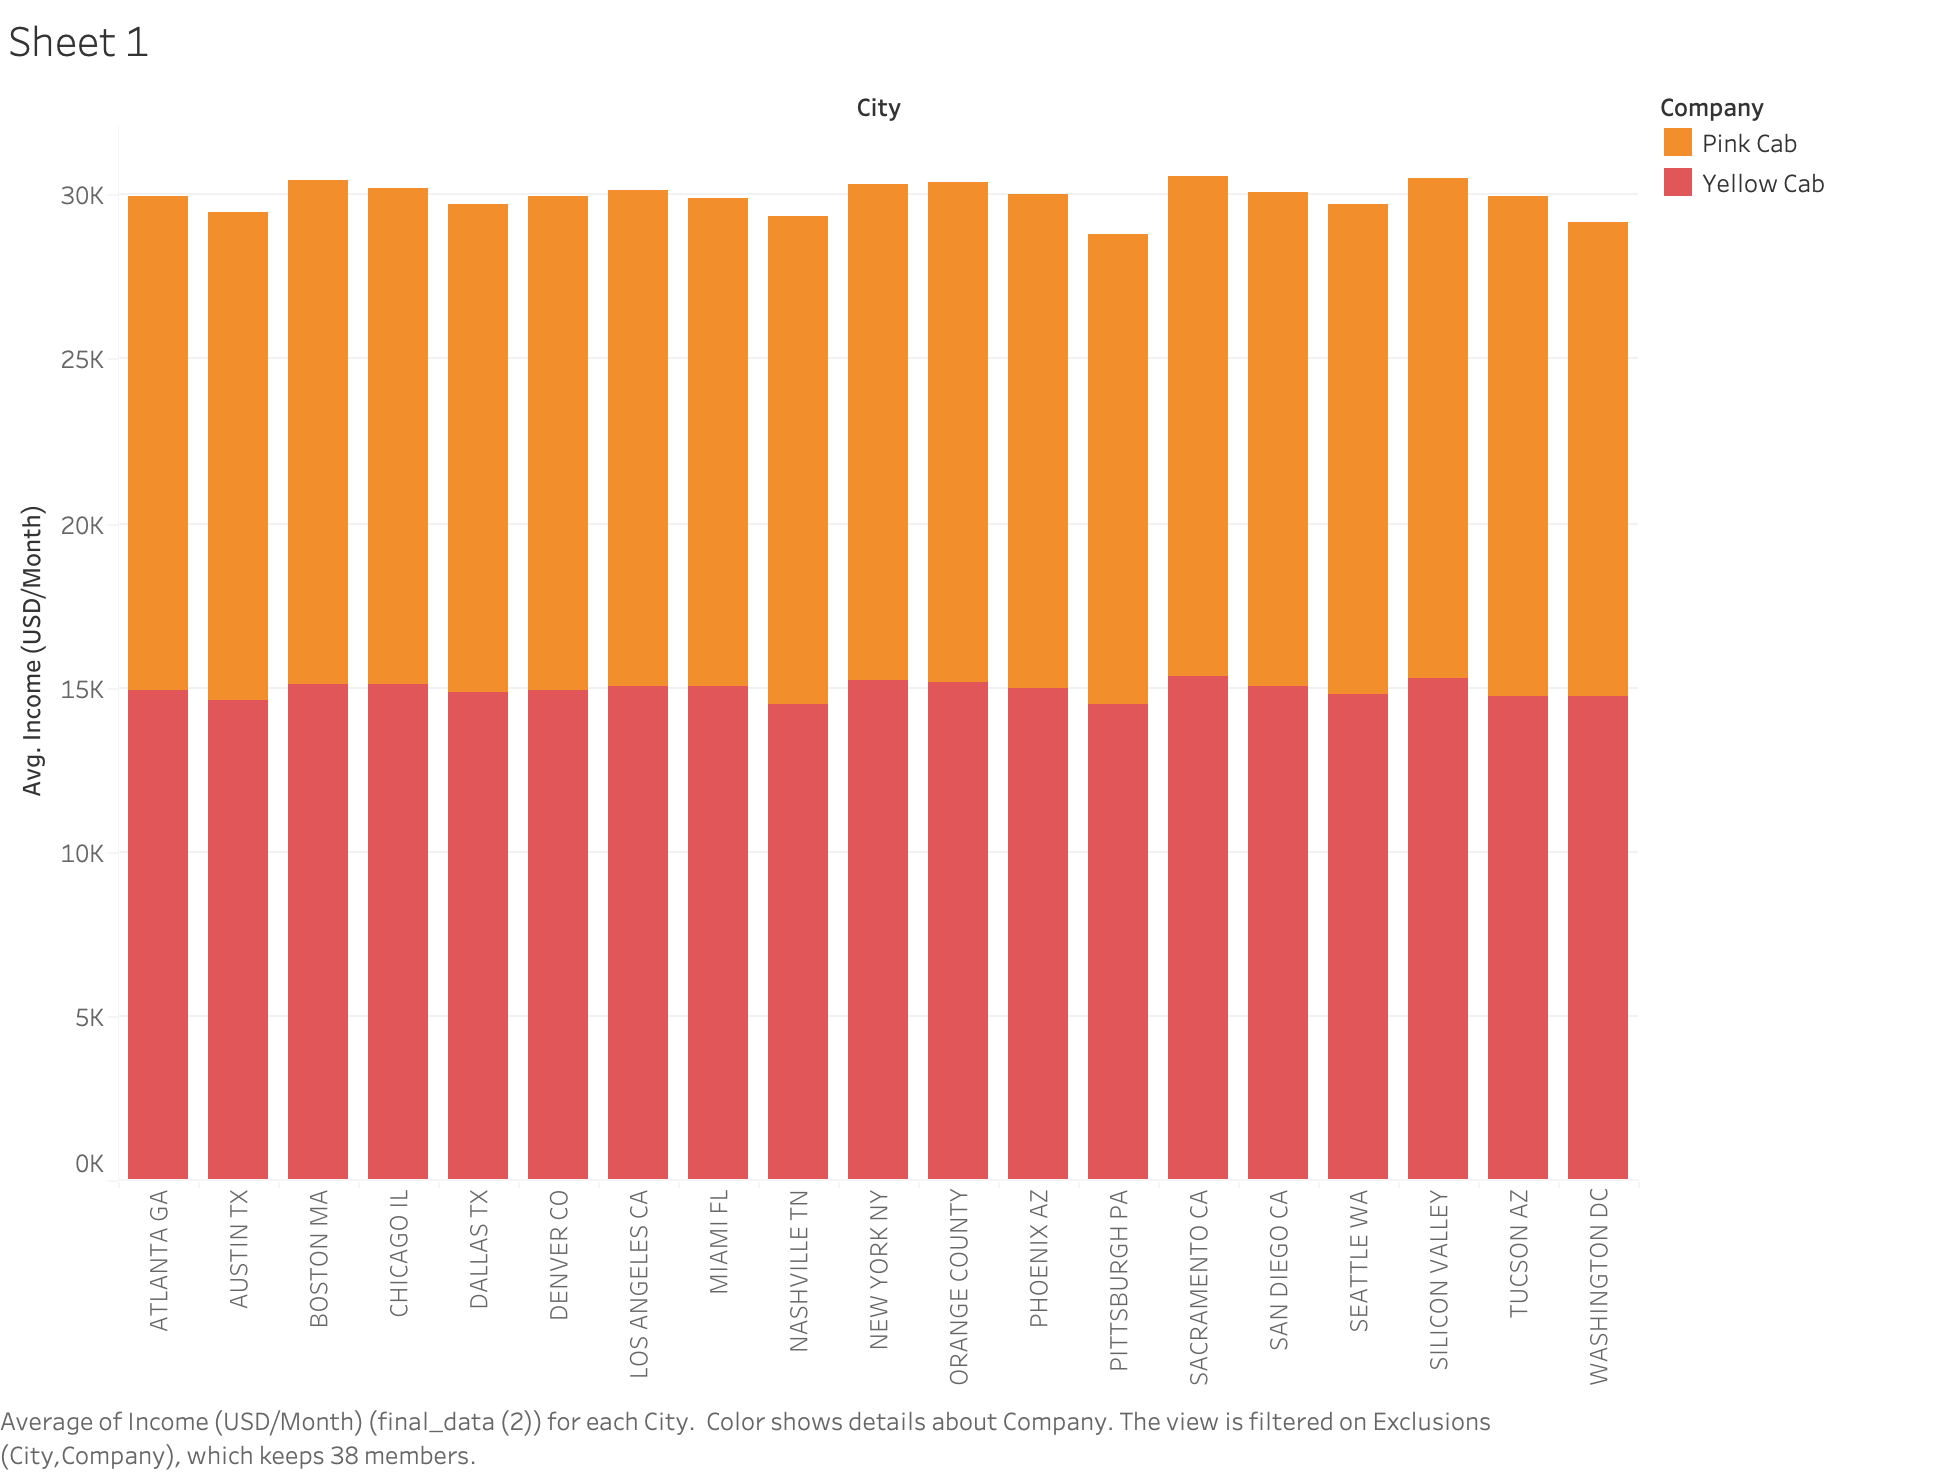

#### We can see that the average income is approximately the same 

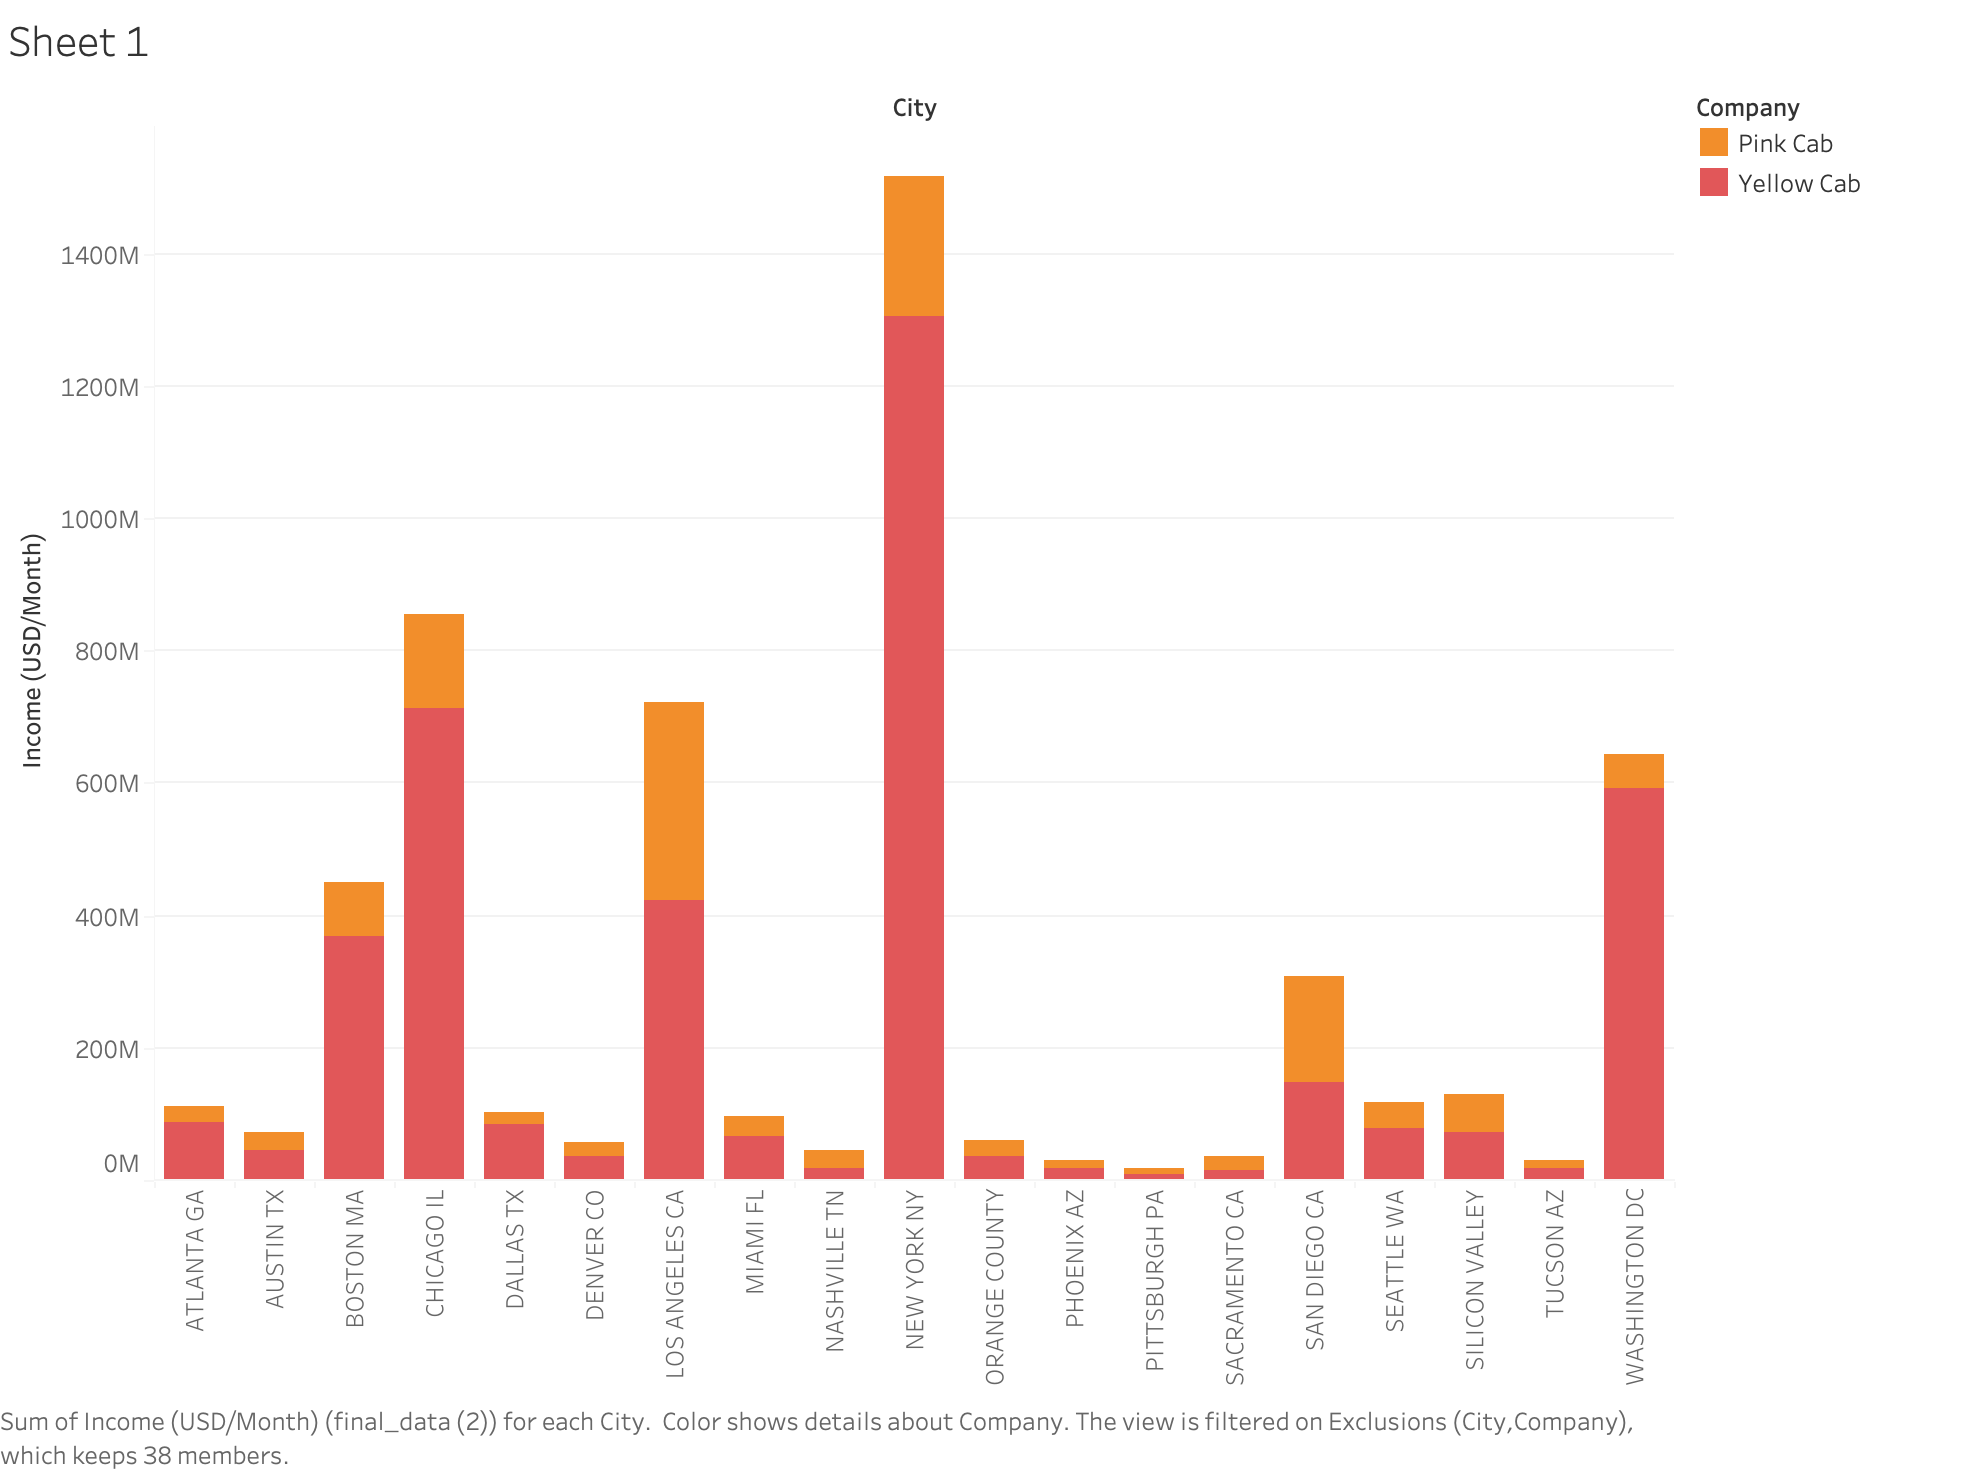

#### However, the sum of the income of Yellow Cab is a lot greater

### Revenue vs age and gender

In [45]:
final_data['Revenue'] = final_data['Price Charged'] - final_data['Cost of Trip']

In [51]:
final_data['age_range'] = pd.cut(final_data['Age'], bins=[18, 30, 40, 50, 65], labels=['young', 'adult', 'mid-age', 'elder'])

In [52]:
final_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Gender,Age,Income (USD/Month),Revenue,age_range
0,10000011,29290,Card,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",Male,28,10813,57.315,young
1,10000012,27703,Card,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",Male,27,9237,23.666,young
2,10000013,28712,Cash,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",Male,53,11242,27.568,elder
3,10000014,28020,Cash,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",Male,23,23327,25.798,young
4,10000015,27182,Card,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",Male,33,8536,16.844,adult


In [49]:
final_data['Age'].min(), final_data['Age'].max()

(18, 65)

In [53]:
final_data.to_csv('../Datasets/final_data.csv')

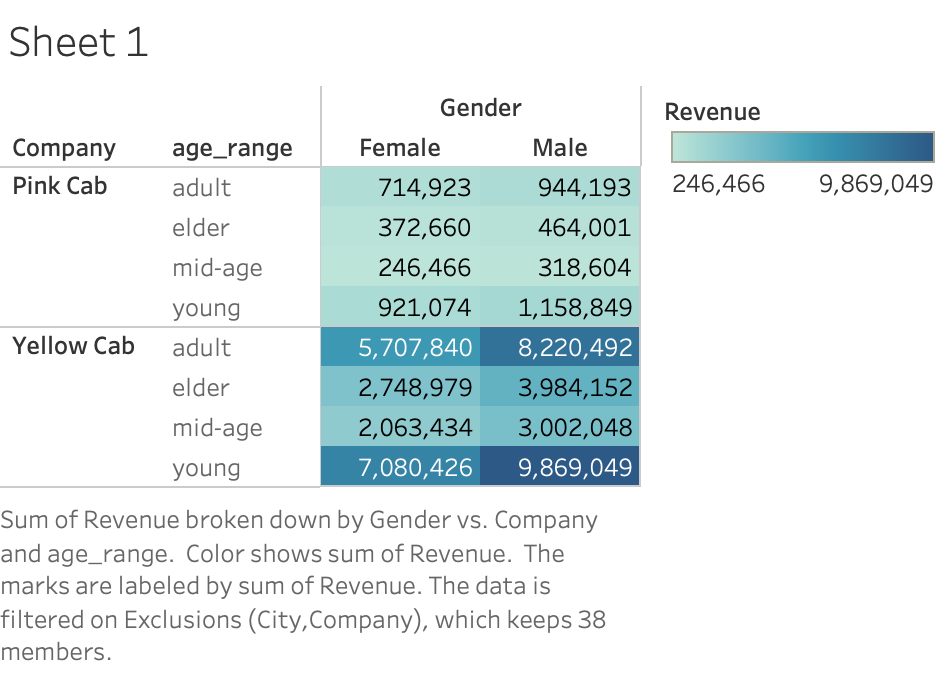

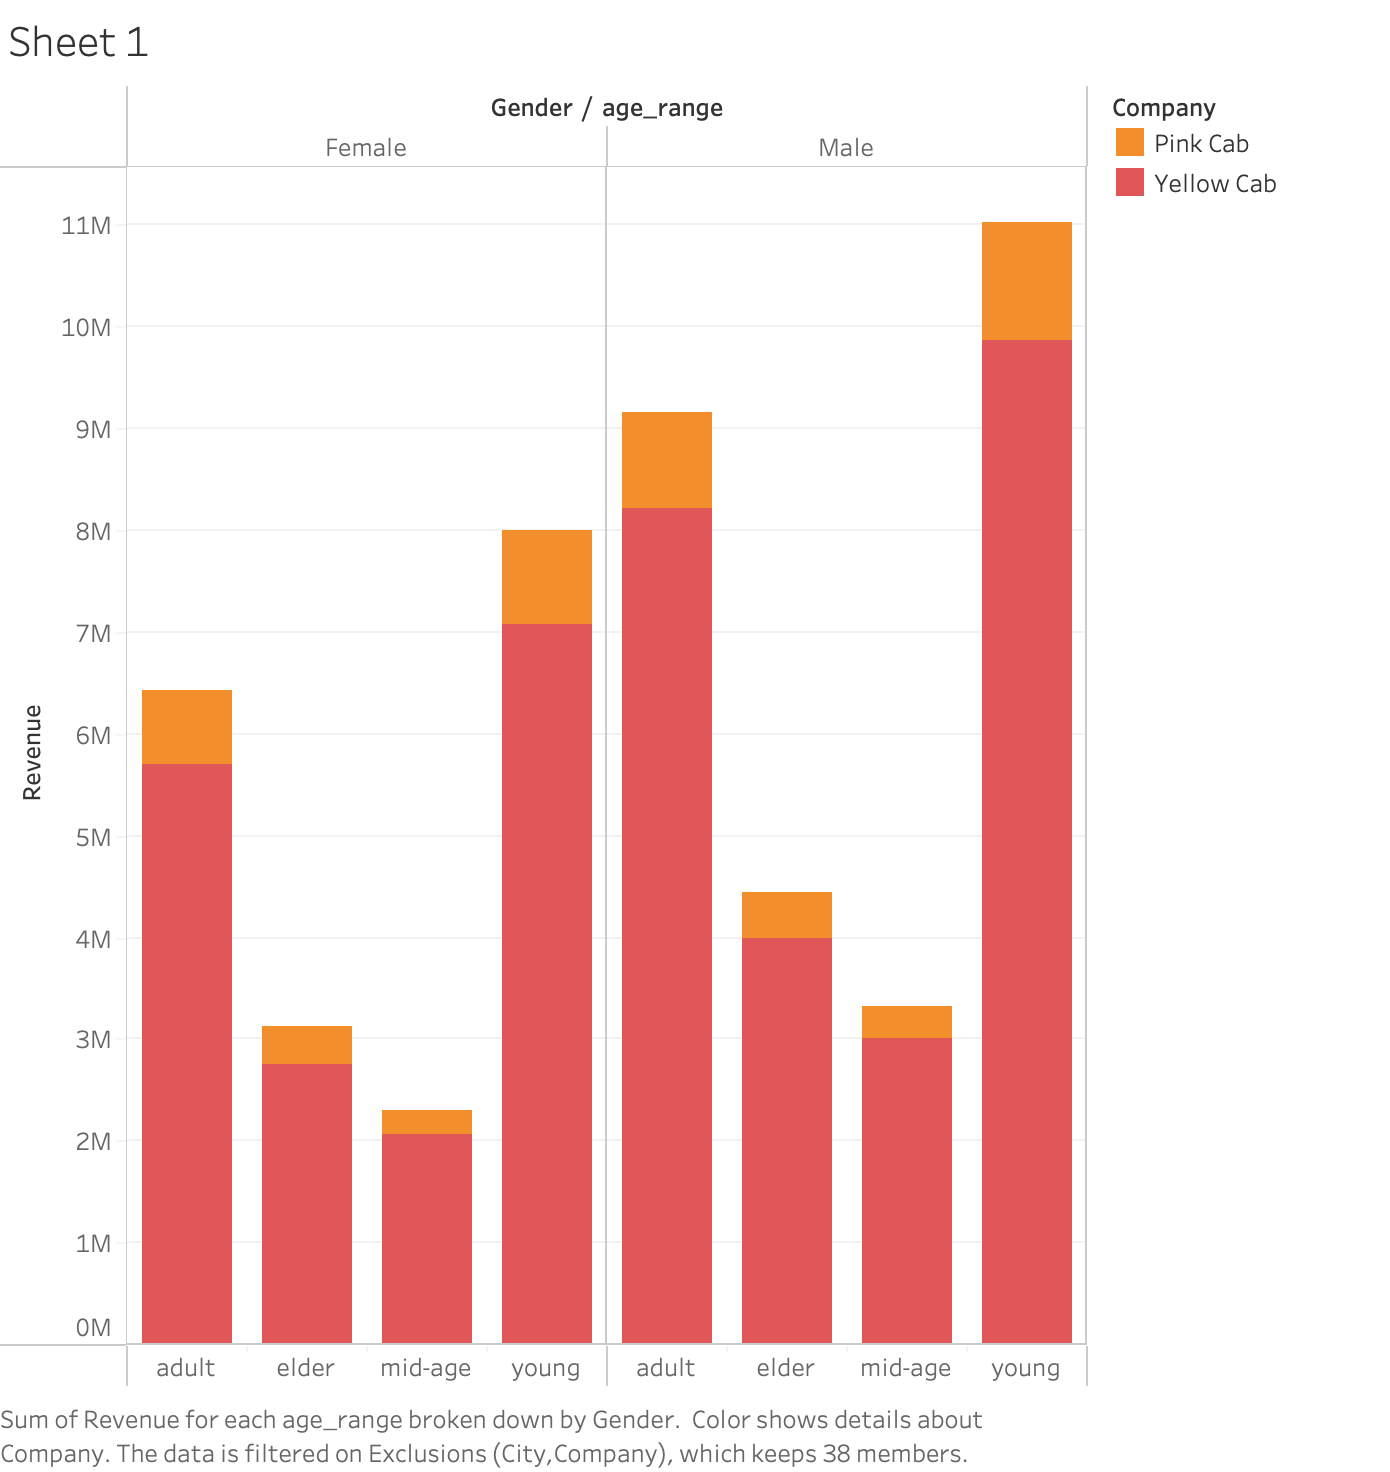

#### We can see that Yellow Cab made more revenue. People under 40 years old seem to spend a lot money on Cabs, and Male spends more money than female. We can see in all of the 8 combination of age and gender, yellow cab got more revenue than pink cab.

### Explore the seasonality

In [80]:
final_data['Date'] = final_data['Date of Travel'].map(lambda x: time.mktime((datetime(1899,12,30) + timedelta(days=x)).timetuple()))

In [82]:
final_data['date'] = final_data['Date'].map(lambda x: datetime.fromtimestamp(x))
final_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Gender,Age,Income (USD/Month),Revenue,age_range,date,year,month,Date
0,10000011,29290,Card,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",Male,28,10813,57.315,young,2016-01-08,1970,1,1.452240e+09
1,10000012,27703,Card,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",Male,27,9237,23.666,young,2016-01-06,1970,1,1.452067e+09
2,10000013,28712,Cash,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",Male,53,11242,27.568,elder,2016-01-02,1970,1,1.451722e+09
3,10000014,28020,Cash,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",Male,23,23327,25.798,young,2016-01-07,1970,1,1.452154e+09
4,10000015,27182,Card,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",Male,33,8536,16.844,adult,2016-01-03,1970,1,1.451808e+09


In [83]:
final_data['year'] = pd.DatetimeIndex(final_data['date']).year
final_data['month'] = pd.DatetimeIndex(final_data['date']).month

In [84]:
final_data.head()

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Gender,Age,Income (USD/Month),Revenue,age_range,date,year,month,Date
0,10000011,29290,Card,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",Male,28,10813,57.315,young,2016-01-08,2016,1,1.452240e+09
1,10000012,27703,Card,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",Male,27,9237,23.666,young,2016-01-06,2016,1,1.452067e+09
2,10000013,28712,Cash,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",Male,53,11242,27.568,elder,2016-01-02,2016,1,1.451722e+09
3,10000014,28020,Cash,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",Male,23,23327,25.798,young,2016-01-07,2016,1,1.452154e+09
4,10000015,27182,Card,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",Male,33,8536,16.844,adult,2016-01-03,2016,1,1.451808e+09


In [85]:
final_data.to_csv('../Datasets/final_data.csv')

#### Month vs Average Profit

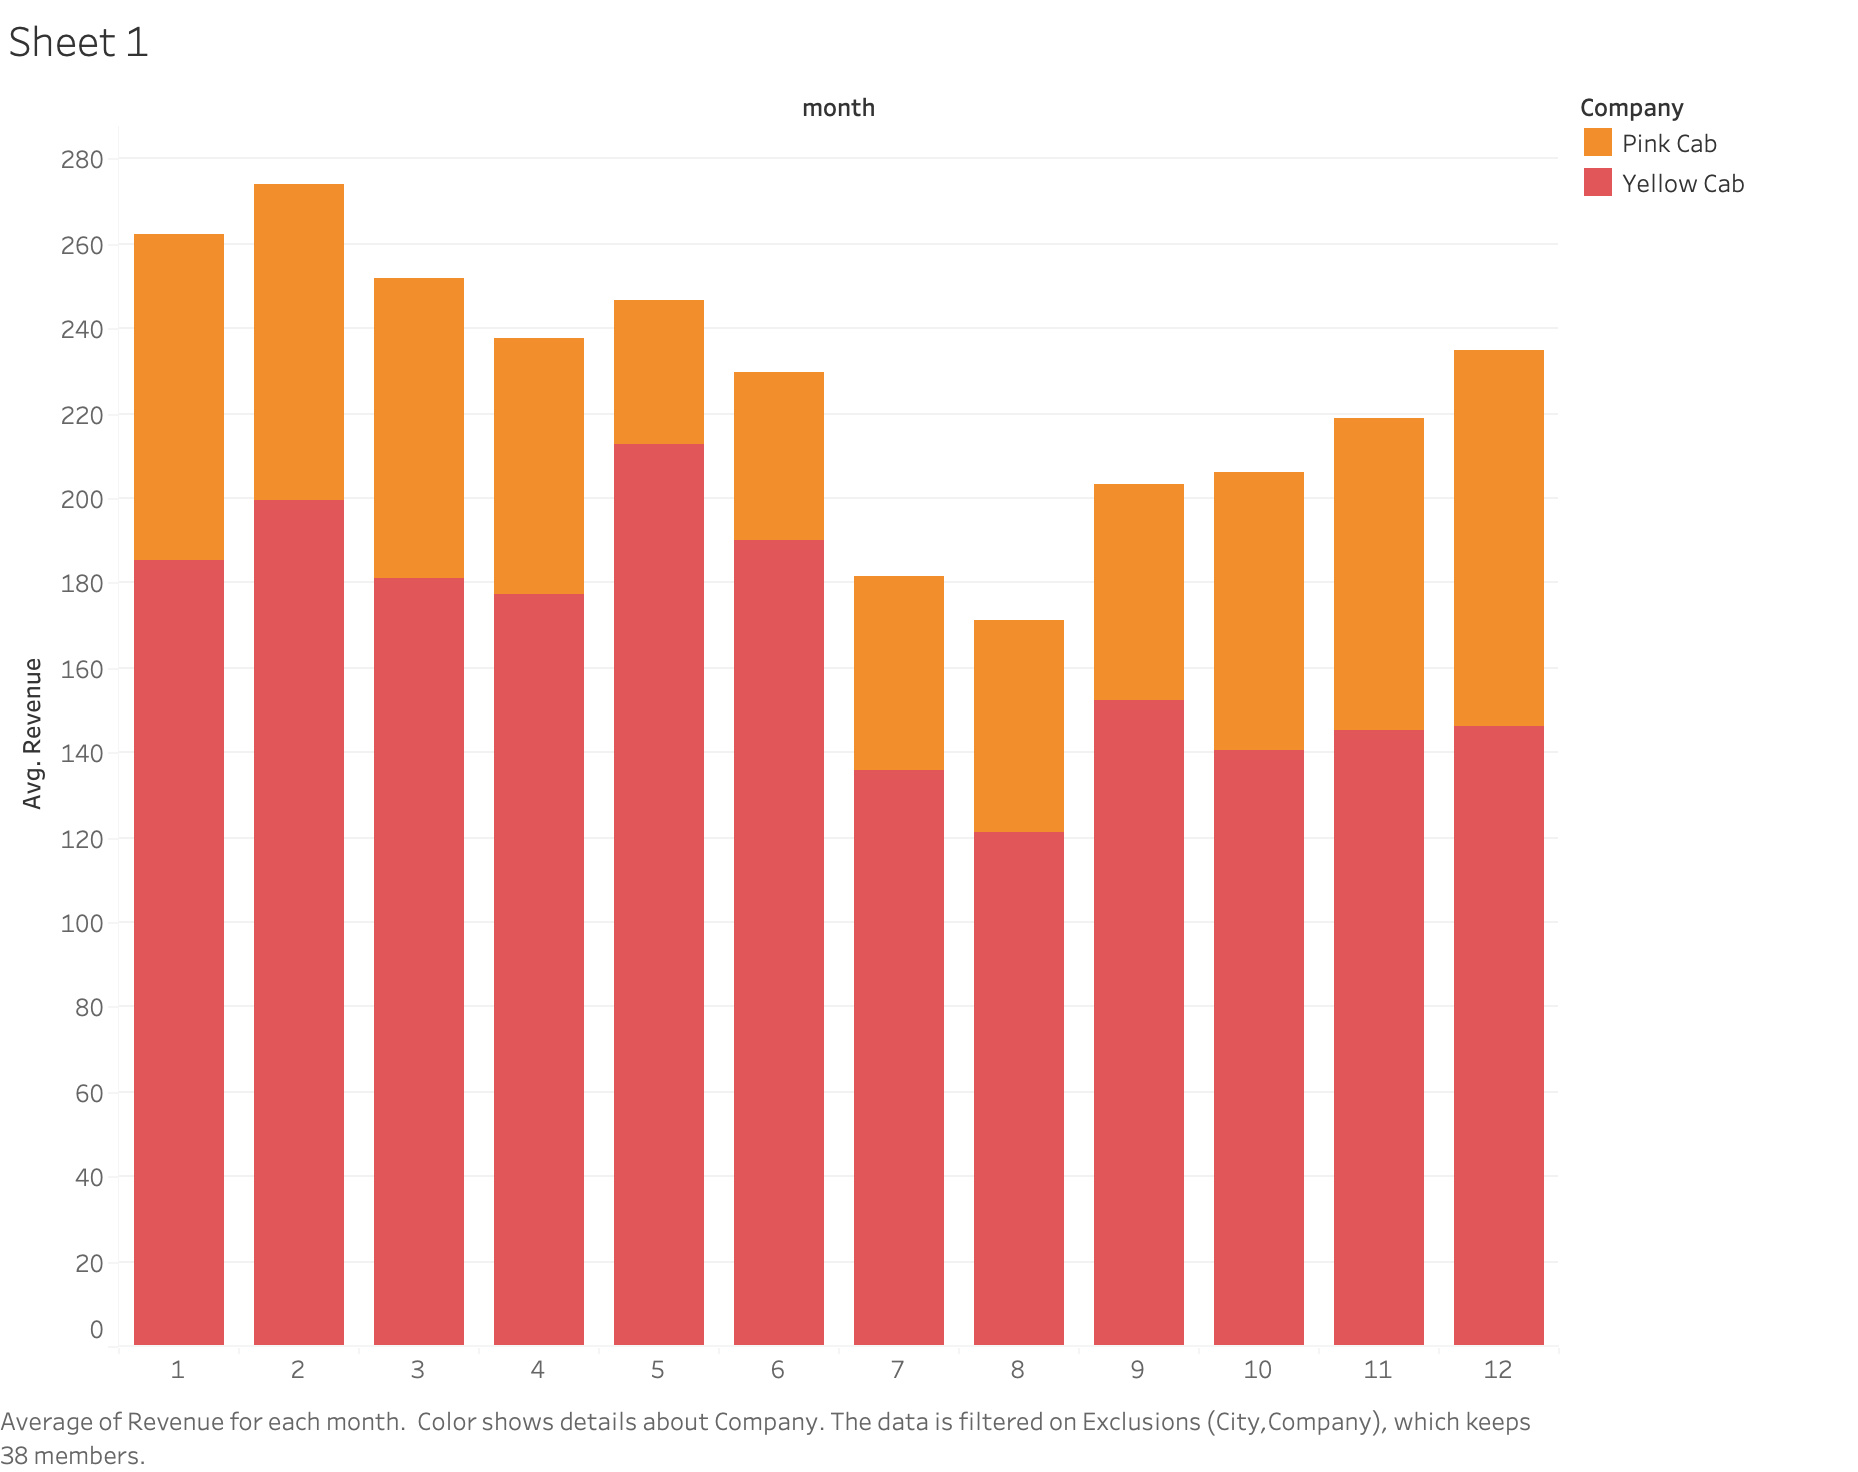

#### Weekday vs Profit

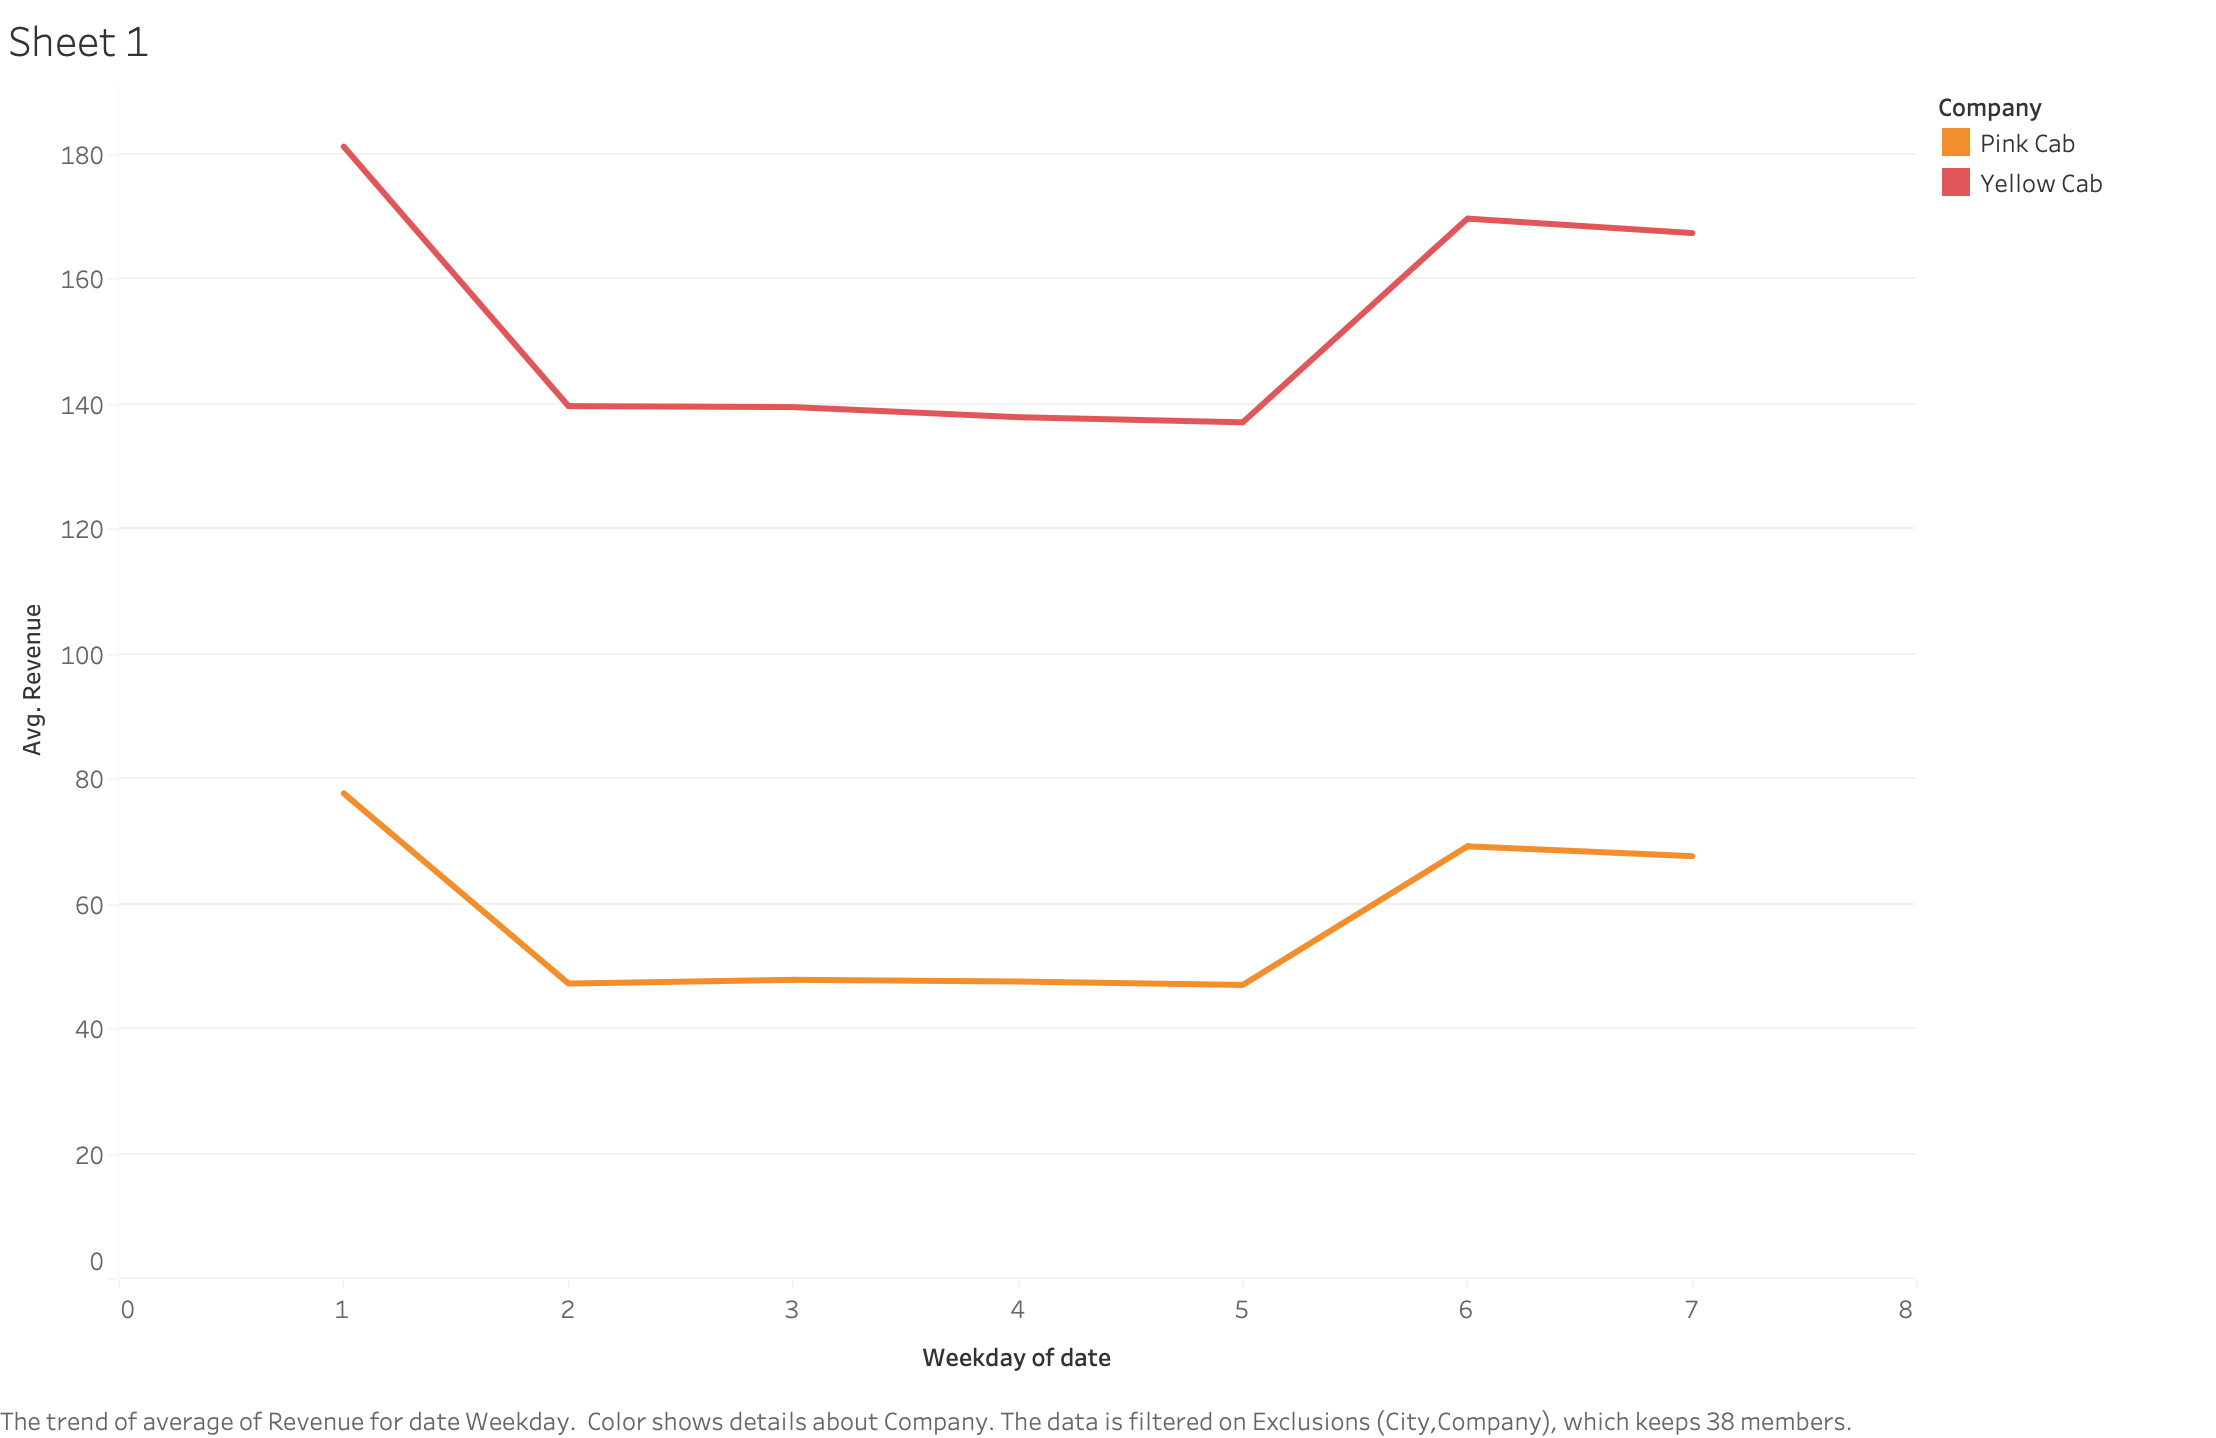

#### We can see there is a trend in both of Cab companies. 

#### Date vs Profit

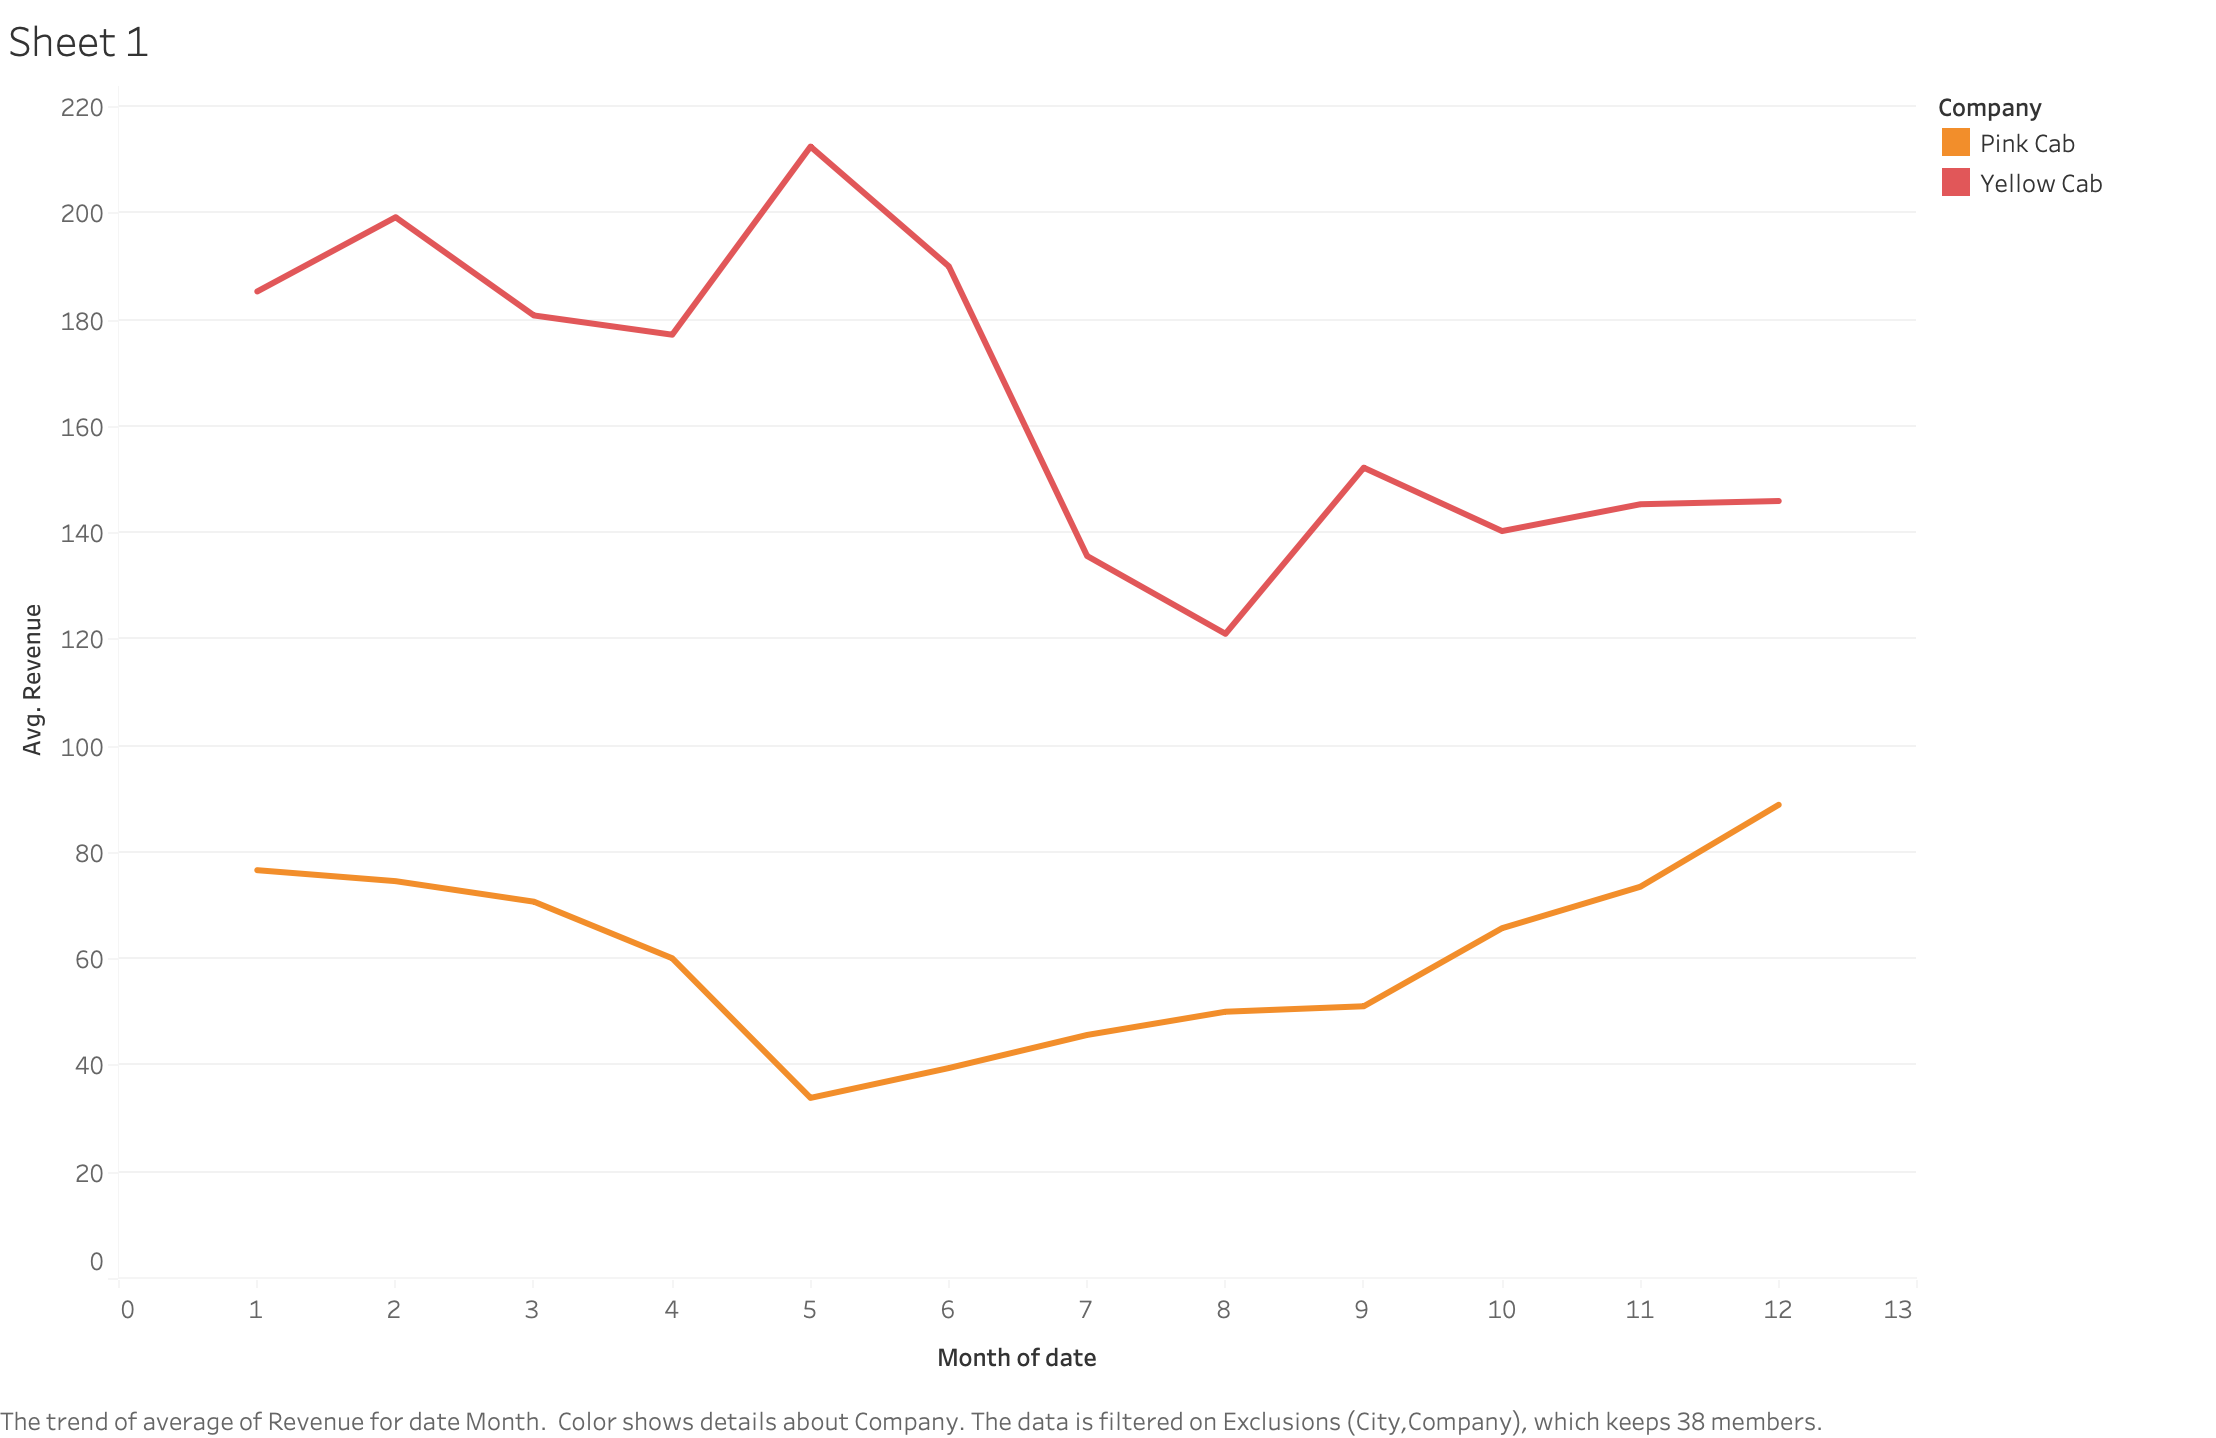

#### Yellow Cab has maximum revenue in May and minimum revenue in August. Pink Cab has maximum revenue in December and minimum in May

### Payment Mode & Age Range vs Profit/Income/Travel Distance

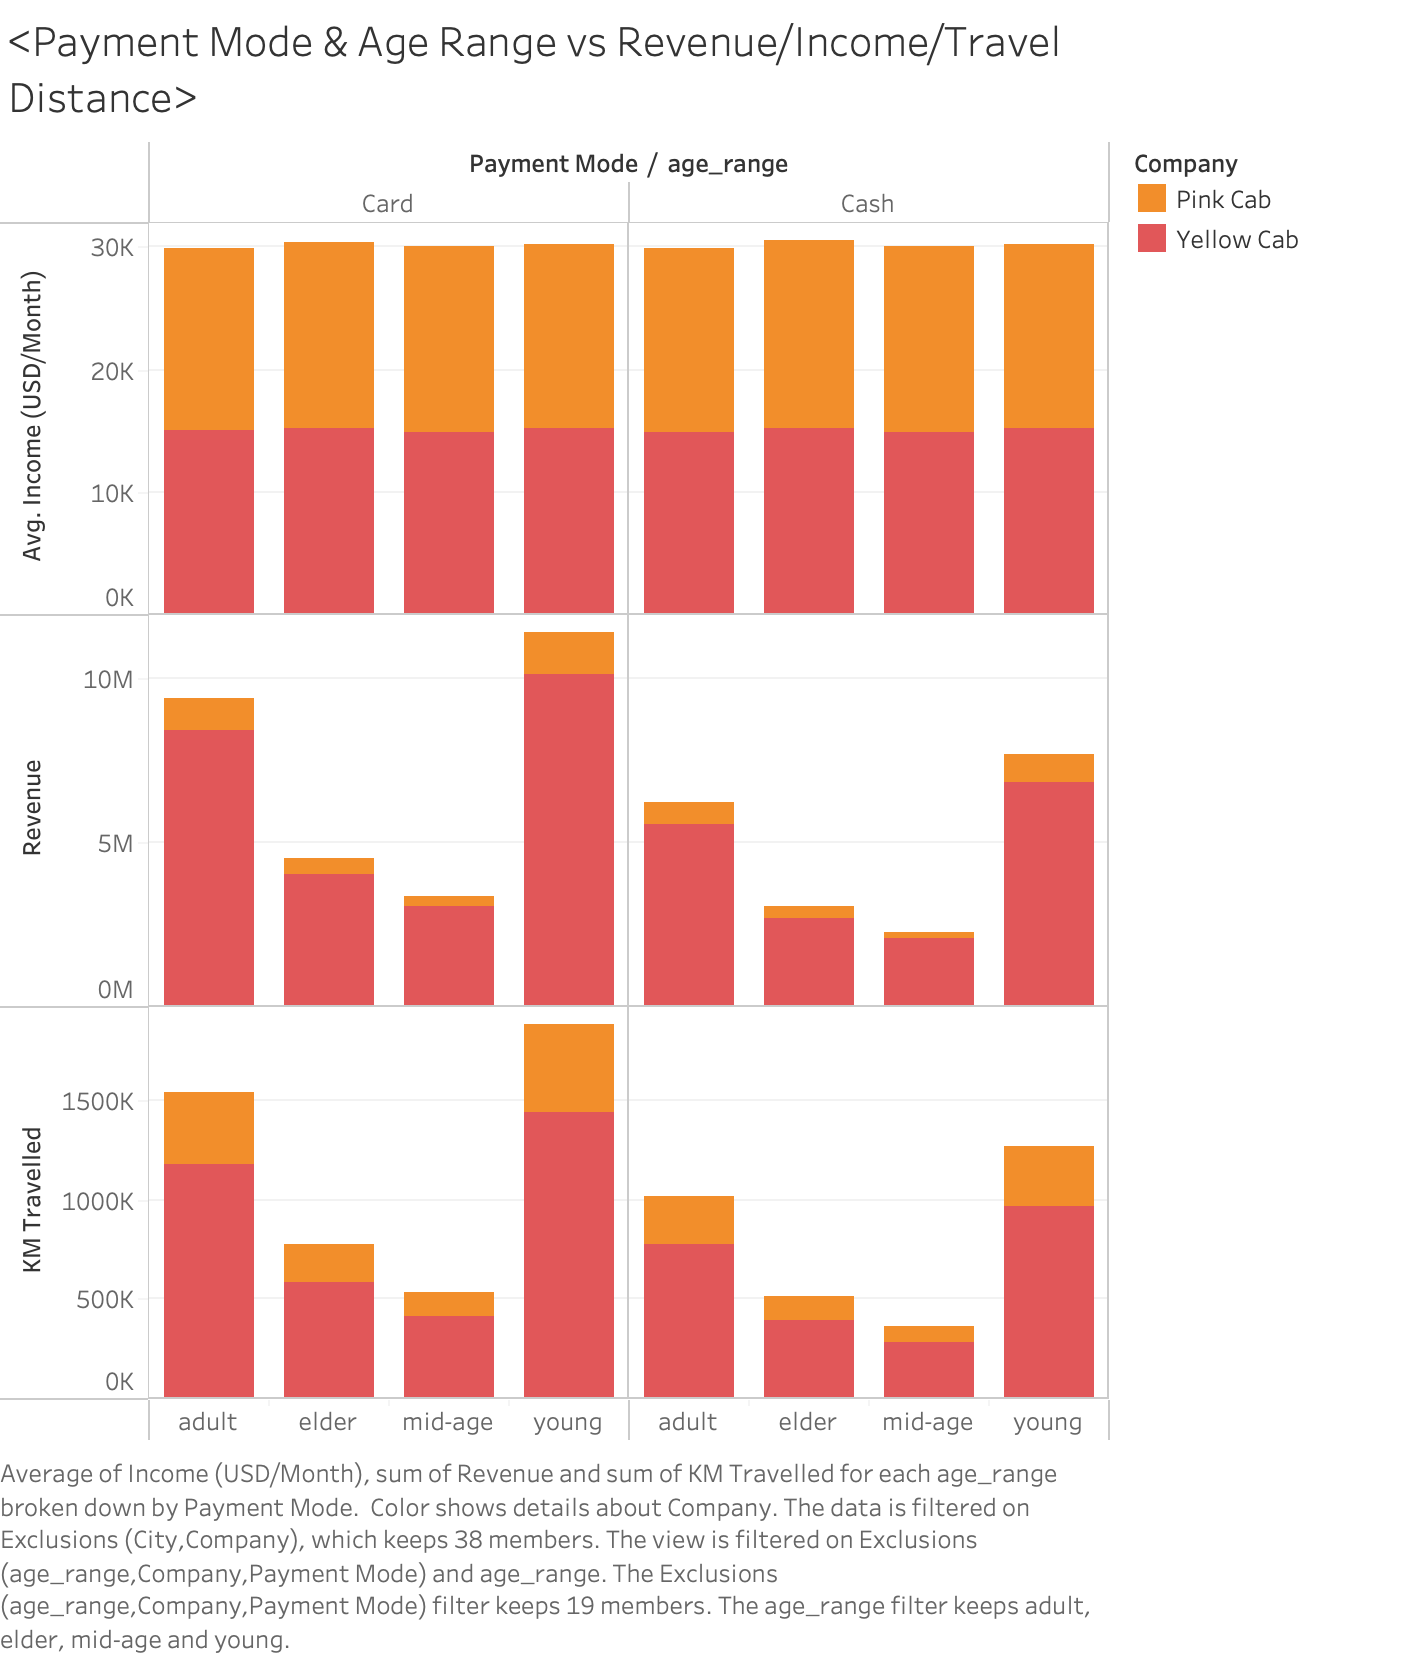

### Profit Summary and Forecast

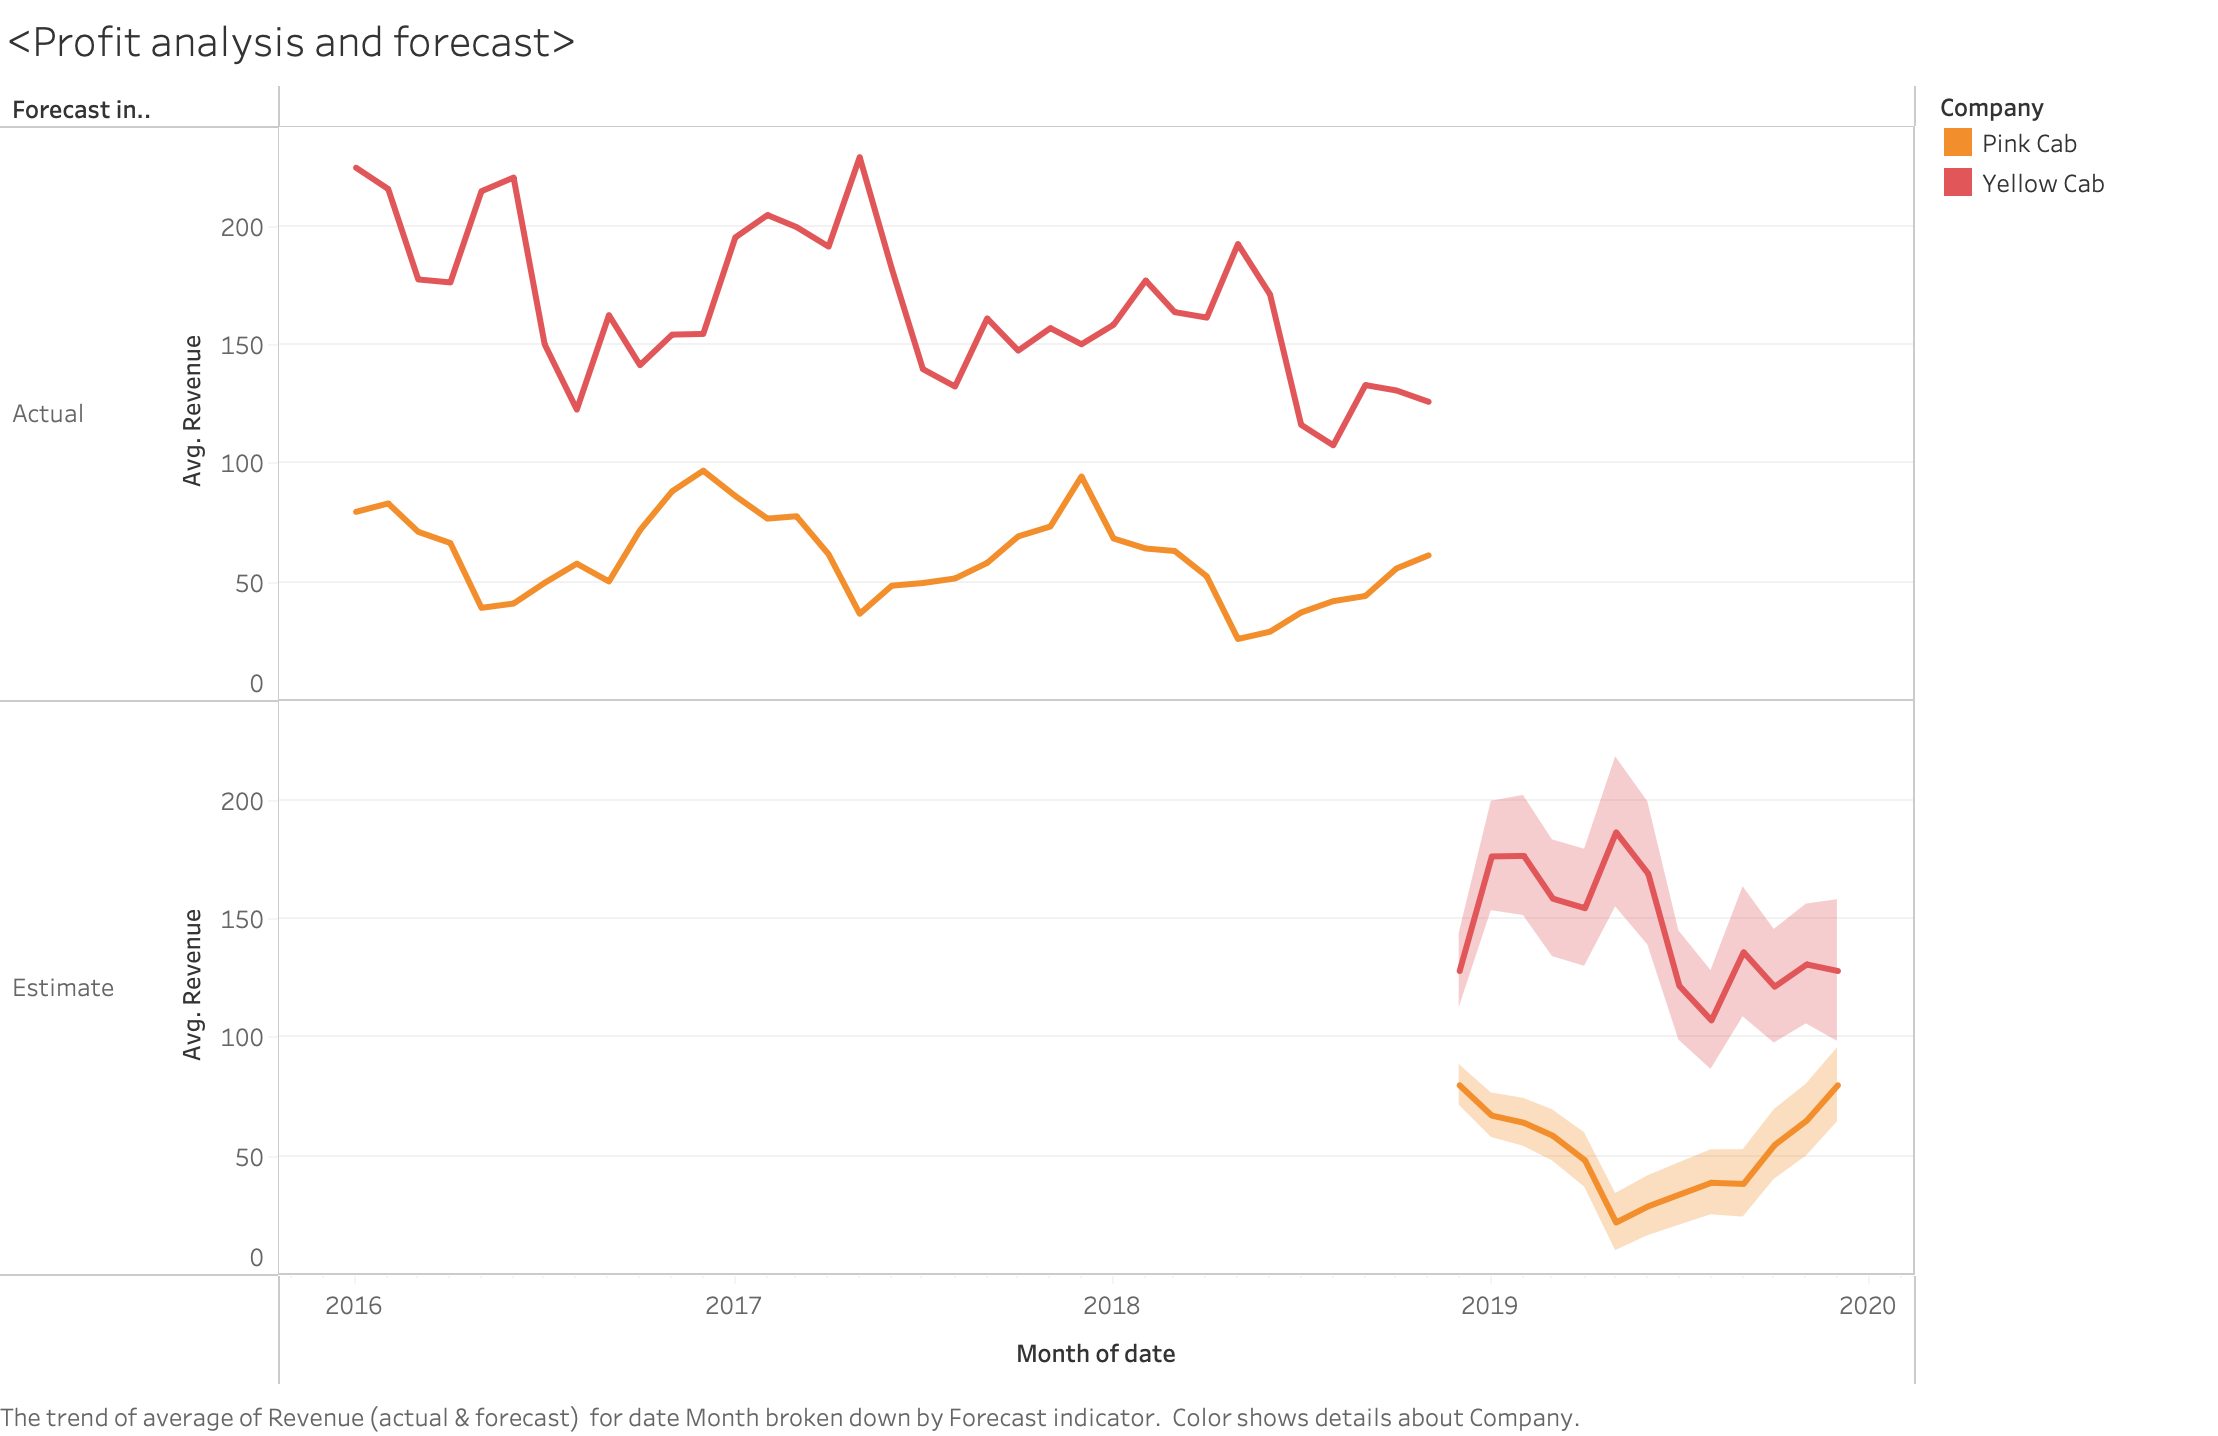

#### We can see that Yellow Cab is greater in both current and future 

### Hence, We applied the following standard for recommandation:
#### 1. Sum of KM travelled vs different company in different places. Yellow Cab has more travel distance in all the places.
#### 2. Average/Sum Income vs different company. Yellow Cab has customers with more income sumed up.
#### 3. Profit vs age and gender. Yellow Cab yield more profit in all age and gender groups.
#### 4. Seasonality. Explored the profit for each month/year/weekday. Yellow Cab has more profit in all of the time pieces.
#### 5. Payment Mode & Age Range vs Profit/Income/Travel Distance. Yellow Cab has more profit over ages and payment modes.
#### 6. Profit Summary and Forecast. Yellow Cab has greater profit in both current and future.
## Hence, I'll recommand Yellow Cab based on the reasons above